In [4]:
import sys

sys.path.append('../../../common_code')
from PostProcessingScripts import * 
from formation_channels import * 
import astropy.stats

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#########
# defi  ne colors for formation channels 
channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'orange',  'immediate CE': '#EF476F'  , r'double-core CE':'#073B4C', 'other':'gray', 'vi':'cyan', 'vii':'#FFD166'}
List_formationchannelOptions = ['All',  'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
ind_formationchannelOptions = [7,  1, 2, 3, 4, 5, 6, 0]
dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}
channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #, 'vi']
#######
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

In [68]:
def plot_percentiles(axe=None, axe_ind=None, xparam='Mass1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS',  \
                     whichWeight='det', path_dir='/Volumes/Andromeda2/DATA/AllDCO_bugfix/', \
                  pathQuantiles = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/summary_quantiles/'):
    #  
    
    # by default available percentiles 
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']

    # overall min and max of the percentiles. 
    minq0_005, minq0_05, minq0_25 = 100, 100, 100
    maxq0_75, maxq0_95, maxq0_995 = -10, -10, -10
    
    xvar_dict = {'Mtot':4,'Mass1':0, 'Mass2':1, 'q':6, 'ChirpMass':5, 'logZ':8, 'Z':7, 'tc':2, 'log10(tc)':3, 'tdelay':9, 'log10(tdelay)':10 }
    xvarind = xvar_dict[xparam] 
    
    xright =1+0.05
    xxx = (len(BPSnameslist)+xright)-1
    Channel ='classic'
    adjustedChannelList = ['classic', 'stable B no CEE', 'immediate CE',  r'double-core CE', 'other']
    
    if DCOtype=='BNS':
        ChannelList = ['classic', r'double-core CE']
    elif DCOtype=='BHNS':
        ChannelList = ['classic', 'stable B no CEE']
    elif DCOtype=='BBH':
        ChannelList = ['classic', 'stable B no CEE']
        
    ChannelList = adjustedChannelList
    
    for ind_Channel, Channel in enumerate(ChannelList):
        
        nZbins = 6
        Metallicity_lower_bins, Metallicity_upper_bins = np.zeros(nZbins), np.zeros(nZbins)
        metallicity_list = np.concatenate((np.asarray(metallicities_list),np.asarray([0.03])))
        for n_rough_Z_bins in range(6): 
            lowerZ, upperZ = 0 + 9*n_rough_Z_bins, 8 + 9*n_rough_Z_bins
            Metallicity_lower_bins[n_rough_Z_bins], Metallicity_upper_bins[n_rough_Z_bins]  = metallicity_list[lowerZ], metallicity_list[upperZ]



        for ind_m, BPSmodelName in enumerate(BPSnameslist):

#             color_m = colorDirDict[BPSmodelName]
            color_m = channelColorDict[Channel]

            axe = ax[ind_m,axe_ind]
            dfname = pathQuantiles + 'distribution_percentiles_model_' + DCOtype  + '_' + BPSmodelName + '_' + Channel + '.csv' 
            df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])

            dx = 0.4 #0.3
            dxrange = np.linspace(-dx, +dx, (nZbins*len(adjustedChannelList))+1) #+ ind_m
            dxlen = (2*dx)/(nZbins*len(adjustedChannelList))



            for ind_Zbin, lowerZbin in enumerate(Metallicity_lower_bins):
                upperZbin = Metallicity_upper_bins[ind_Zbin]    

                key_ = xparam + '_' + str(Metallicity_lower_bins[ind_Zbin]) + '<Z<' + str(Metallicity_upper_bins[ind_Zbin])

    #             key_  = xparam + '_' + MSSFRname 
                q0_005, q0_05, q0_25 = df.iloc[0:3][key_]# , df.iloc[1][key_], df.iloc[3][key_]
                q0_5  = df.iloc[4][key_]#[ind_mssfr]
                q0_75 = df.iloc[5][key_]#[ind_mssfr]
                q0_95 = df.iloc[7][key_]#[ind_mssfr]
                q0_995= df.iloc[8][key_]#[ind_mssfr]




                minq0_005 = np.min([minq0_005, q0_005])
                minq0_05 = np.min([minq0_05, q0_05])
                minq0_25 = np.min([minq0_25, q0_25])

                maxq0_75 = np.max([maxq0_75, q0_75])
                maxq0_95 = np.max([maxq0_95, q0_95])
                maxq0_995 = np.max([maxq0_995, q0_995])




                for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):

                    xx = dxrange[ind_Zbin+(ind_Channel*nZbins)]

                    if interval=='median':                     
                        axe.scatter(q0_5, xx, \
                                    c=np.array([color_m]), s=120, label=None, \
                                    marker='.', zorder=200)  

                    elif interval =='99percent':
                        zorder = 102
                        yy = [q0_005, q0_995]
                        alpha = 0.15
                    elif interval=='90percent':
                        zorder = 105
                        yy = [q0_05, q0_95]
                        alpha = 0.25    
                    elif interval=='50percent':
                        zorder = 110
                        yy = [q0_25, q0_75]
                        alpha = 0.4                         

                    axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color='white', alpha=1, \
                           height=dxlen, zorder=zorder-1)
                    axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color=color_m, alpha=alpha, \
                           height=dxlen, zorder=zorder)



                    
############        

  # PLOT OVERALL MIN & MAX QUANTILES>          
#     xx = [-0.5, len(BPSnameslist)+xright]
#     yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
#     yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
#     yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]

    
    
#     for ind_m, BPSmodelName in enumerate(BPSnameslist):

        
        
#         axe = ax[ind_m,axe_ind]    
    

#         axe.fill_betweenx(xx, x1=yymin99, x2=yymax99,   color='white', zorder=0 , alpha =1 )
#         axe.fill_betweenx(xx, x1=yymin99, x2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )

#         axe.fill_betweenx(xx, x1=yymin90, x2=yymax90,  color='white', zorder=2 , alpha =1 )
#         axe.fill_betweenx(xx, x1=yymin90, x2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )

#         axe.fill_betweenx(xx, x1=yymin50, x2=yymax50,  color='white', zorder=4 , alpha =1 )     
#         axe.fill_betweenx(xx, x1=yymin50, x2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    
    return





In [69]:

def make_up_axis(axe=None, axe_ind=0, BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):
    for ind_bps, bps_name in enumerate(BPSnameslist):
        
        axe = ax[ind_bps, axe_ind]
#         if ind_bps 

                
        if logY==True:
            axe.set_yscale('log')
        if logX==True:
            axe.set_xscale('log')
        if xlim:
            axe.set_xlim(xlim[0], xlim[1])
        if ylim:
            axe.set_ylim(ylim[0], ylim[1])
        
        if bps_name != BPSmodelNames[-1]:
            
            axe.set_xticklabels( () )
            axe.set_xticks([])

            axe.set_yticks([])
            axe.set_yticklabels( () )
            
        
        
        
        
        if  (nameX==None):

            axe.set_xticklabels( () )
            axe.set_xticks([])

        elif (nameY==None):
            axe.set_yticks([])
            axe.set_yticklabels( () )   
            
            
#         if (nameX!=None) & (nameY==None):
#             layoutAxesNoYlabel()

    return 





def make_up_axis_single_ax(axe=None, bps_name='A', BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):

#         if ind_bps 


    if logY==True:
        axe.set_yscale('log')
    if logX==True:
        axe.set_xscale('log')
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

#     if bps_name != BPSmodelNames[-1]:

#         axe.set_xticklabels( () )
#         axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )




#     else:
    if  (nameX==None):
        axe.set_xticklabels( () )
        axe.set_xticks([])

    elif (nameY==None):
        axe.set_yticks([])
        axe.set_yticklabels( () )   




    return 



In [70]:





def mass_distribution_plot(axe=None, axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, labelname='xlabel name', \
                              whichWeight='det', path_dir='/Volumes/Andromeda2/DATA/AllDCO_bugfix/', quantiles=False,\
                  pathQuantiles = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/summary_quantiles/'):
    

    
    
    
    
    if quantiles==True:
        plot_percentiles(axe, axe_ind, xparam, BPSmodelNames, MSSFRmodelNames, DCOtype,  \
                              whichWeight, path_dir, pathQuantiles)
#     else:# quantiles==True:
#         plot_kdes(axe, axe_ind, xparam, BPSmodelNames, MSSFRmodelNames, DCOtype, xvarrange, \
#                               whichWeight, path_dir)


        

    
    
    return






In [71]:
def layoutAxesNoXlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True, rotation=0):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    # ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad, rotation=rotation, va="center")#, fontweight='bold')    




    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


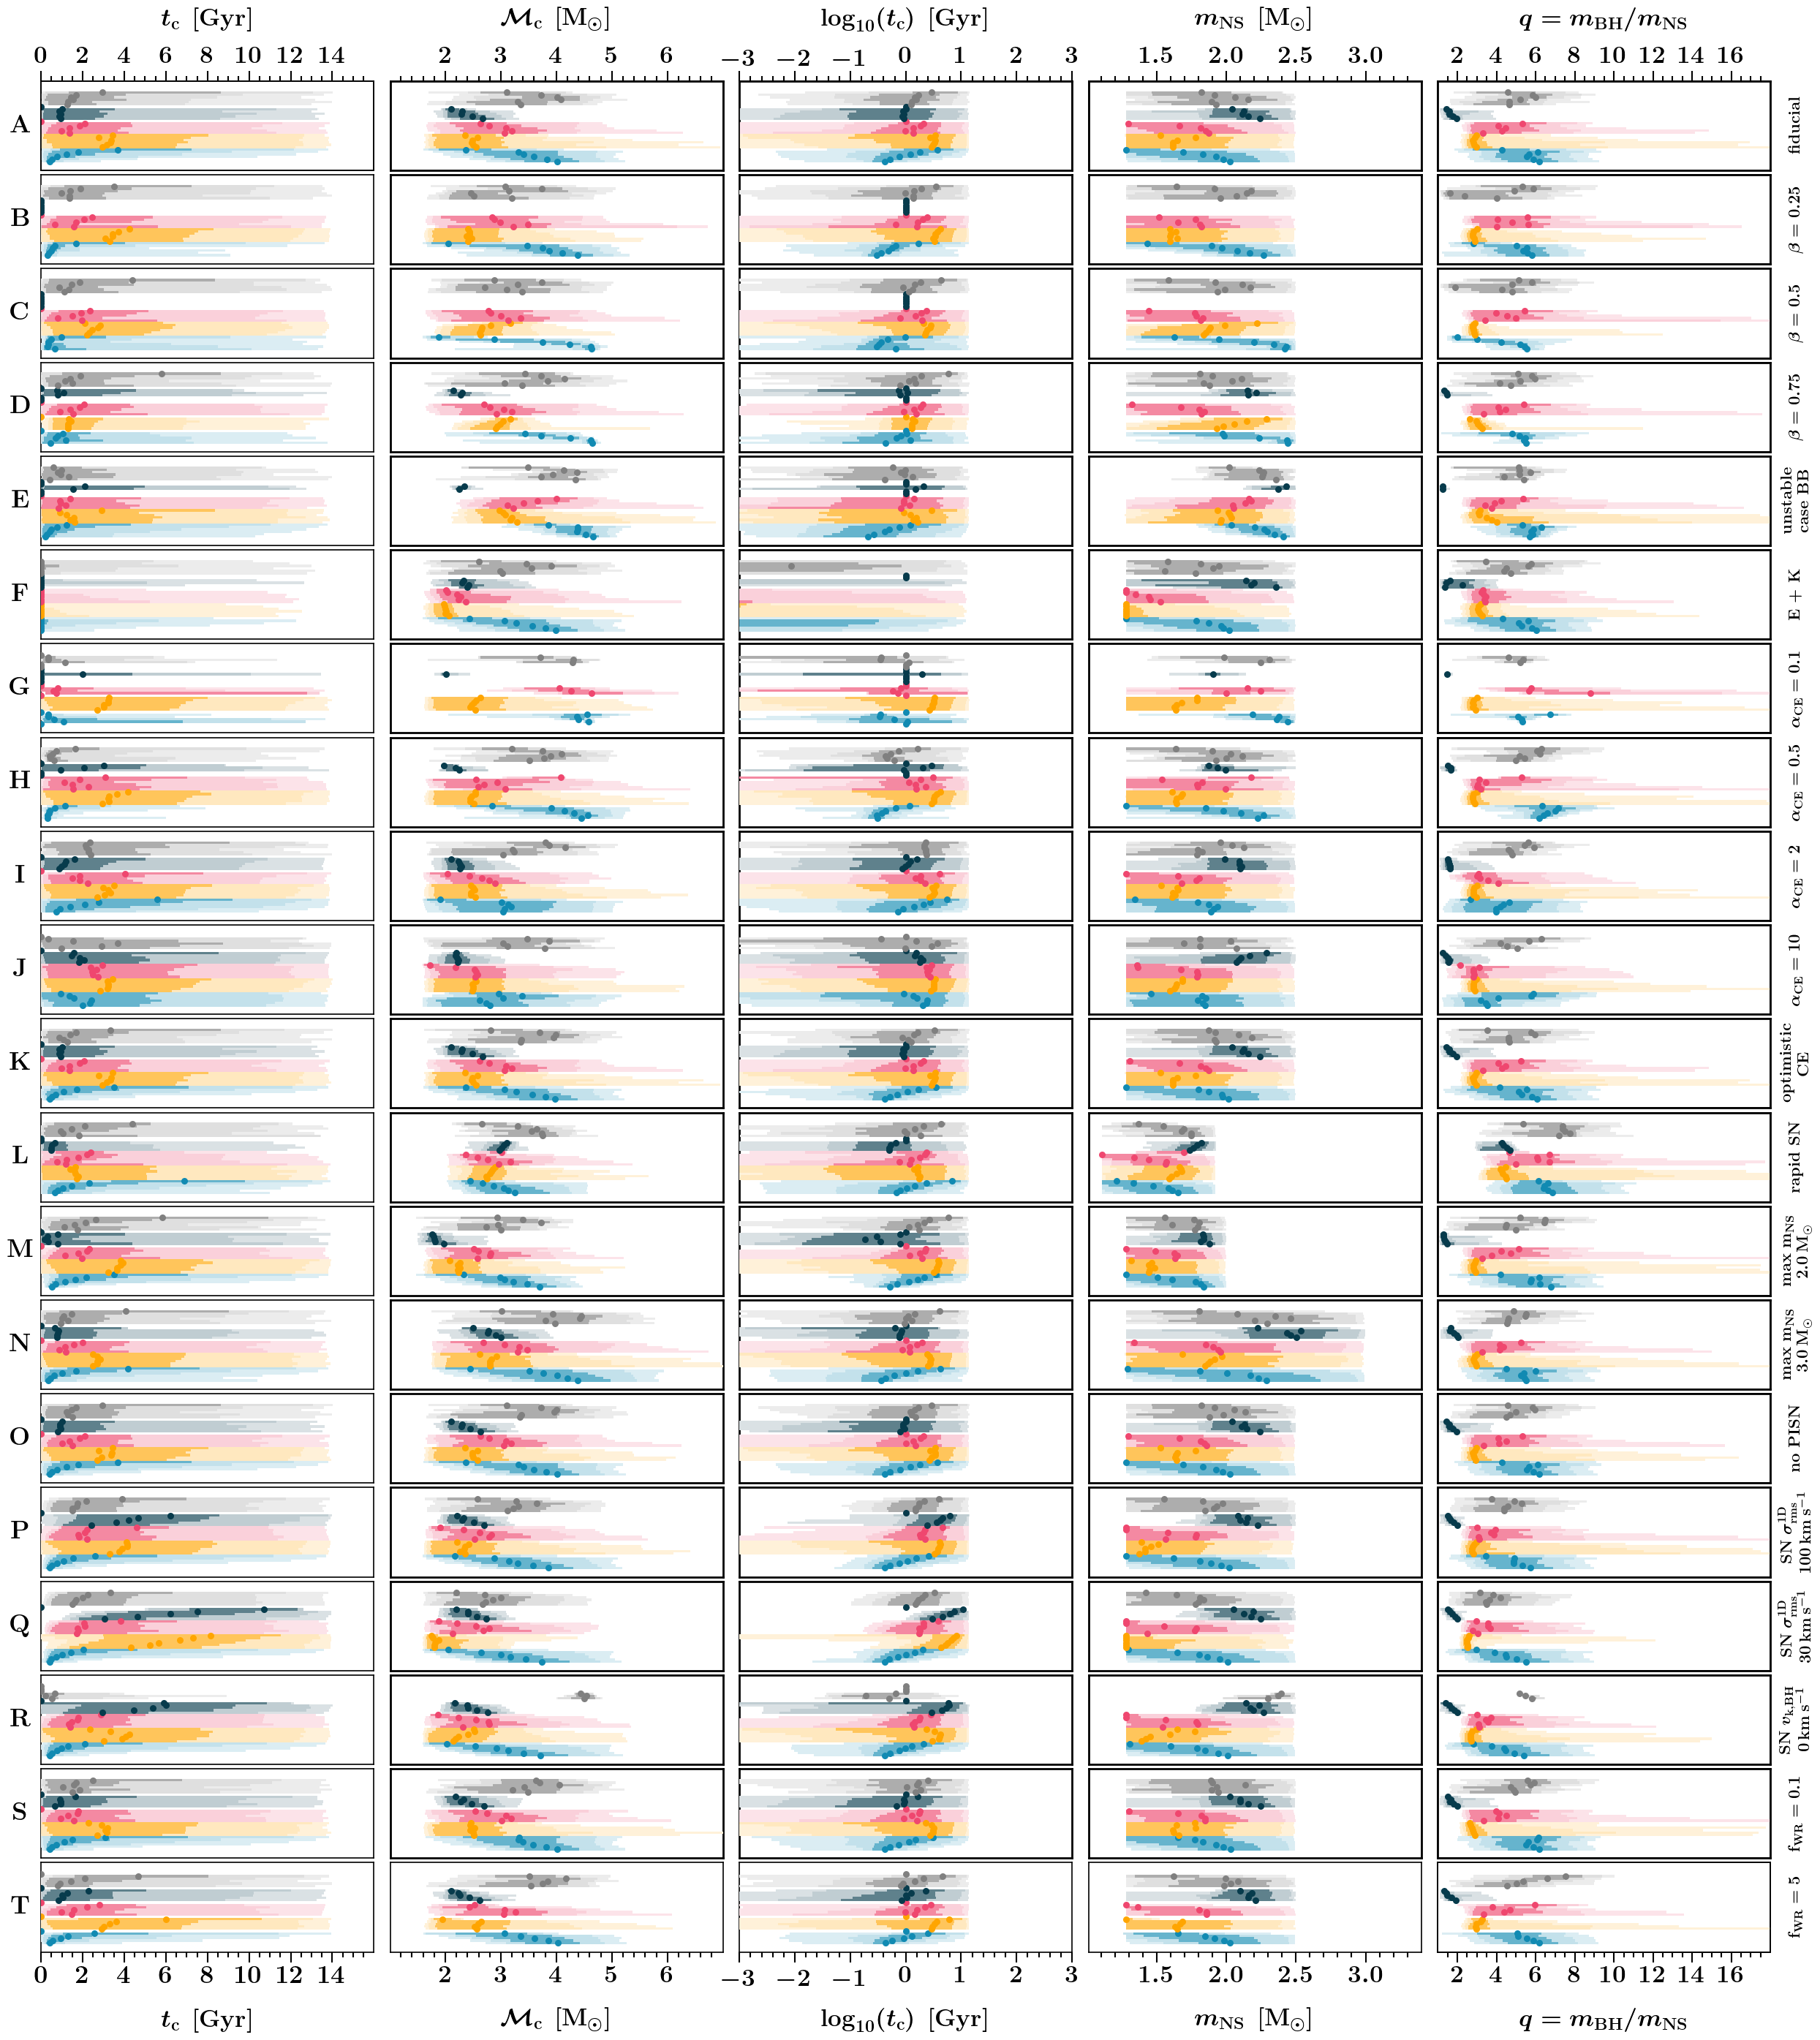

In [72]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'





ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



# MSSFRalphas = [1., 0.5, 0.5, 0.5]
# MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

# MSSFRnameslist = ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BHNS'
DCOtype='BHNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
# nModels=17  # number of BPS models we are comparing
# BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='stroopwafel' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/summary_quantiles/'
fs_t = 24


# # # FIRST COLUMN WITH CHIRP MASS ###
# xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# # # plot percentiles:
# # ylim_max = plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 10], \
# #                               whichWeight=whichWeight, path_dir=path_dir)


## FIRST  COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tc', 0,  r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[0,15.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 



# xlim=[1.01,6.999]
# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label
# ylim=None
# ax2x = ax[0,axe_ind].twiny()
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)


# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)



## FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
mass_distribution_plot(ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 
xlim, ylim=[1.01,6.999], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# bottom label 
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)





# ## FIRST COLUMN WITH BH MASS ###
# xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
# xlim, ylim = [1.01,30.99999], [-0.5, 0.5]
# mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
#         MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 31],  labelname=xlabelname, \
#                                 whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 

# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# # top label 
# ax2x = ax[0,axe_ind].twiny()
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)




####### COLUMN WITH log10 tdelay ########
xparam, axe_ind, xlabelname ='log10(tc)', 2,  r' $\log_{10}(t_{\rm{c}})$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[-3,3], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 









## FIRST COLUMN WITH NS MASS ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,3.3999], [-0.5, 0.5]
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 3],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)

# bottom label 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)








## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{BH}} / {m}_{\rm{NS}}$'
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 20],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 

xlim, ylim=[1.0,17.99999], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=16)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)  
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + TYPE+ 'channels.png', transparent=False)
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + TYPE+ 'channels.pdf', transparent=False)
plt.show()
plt.close()






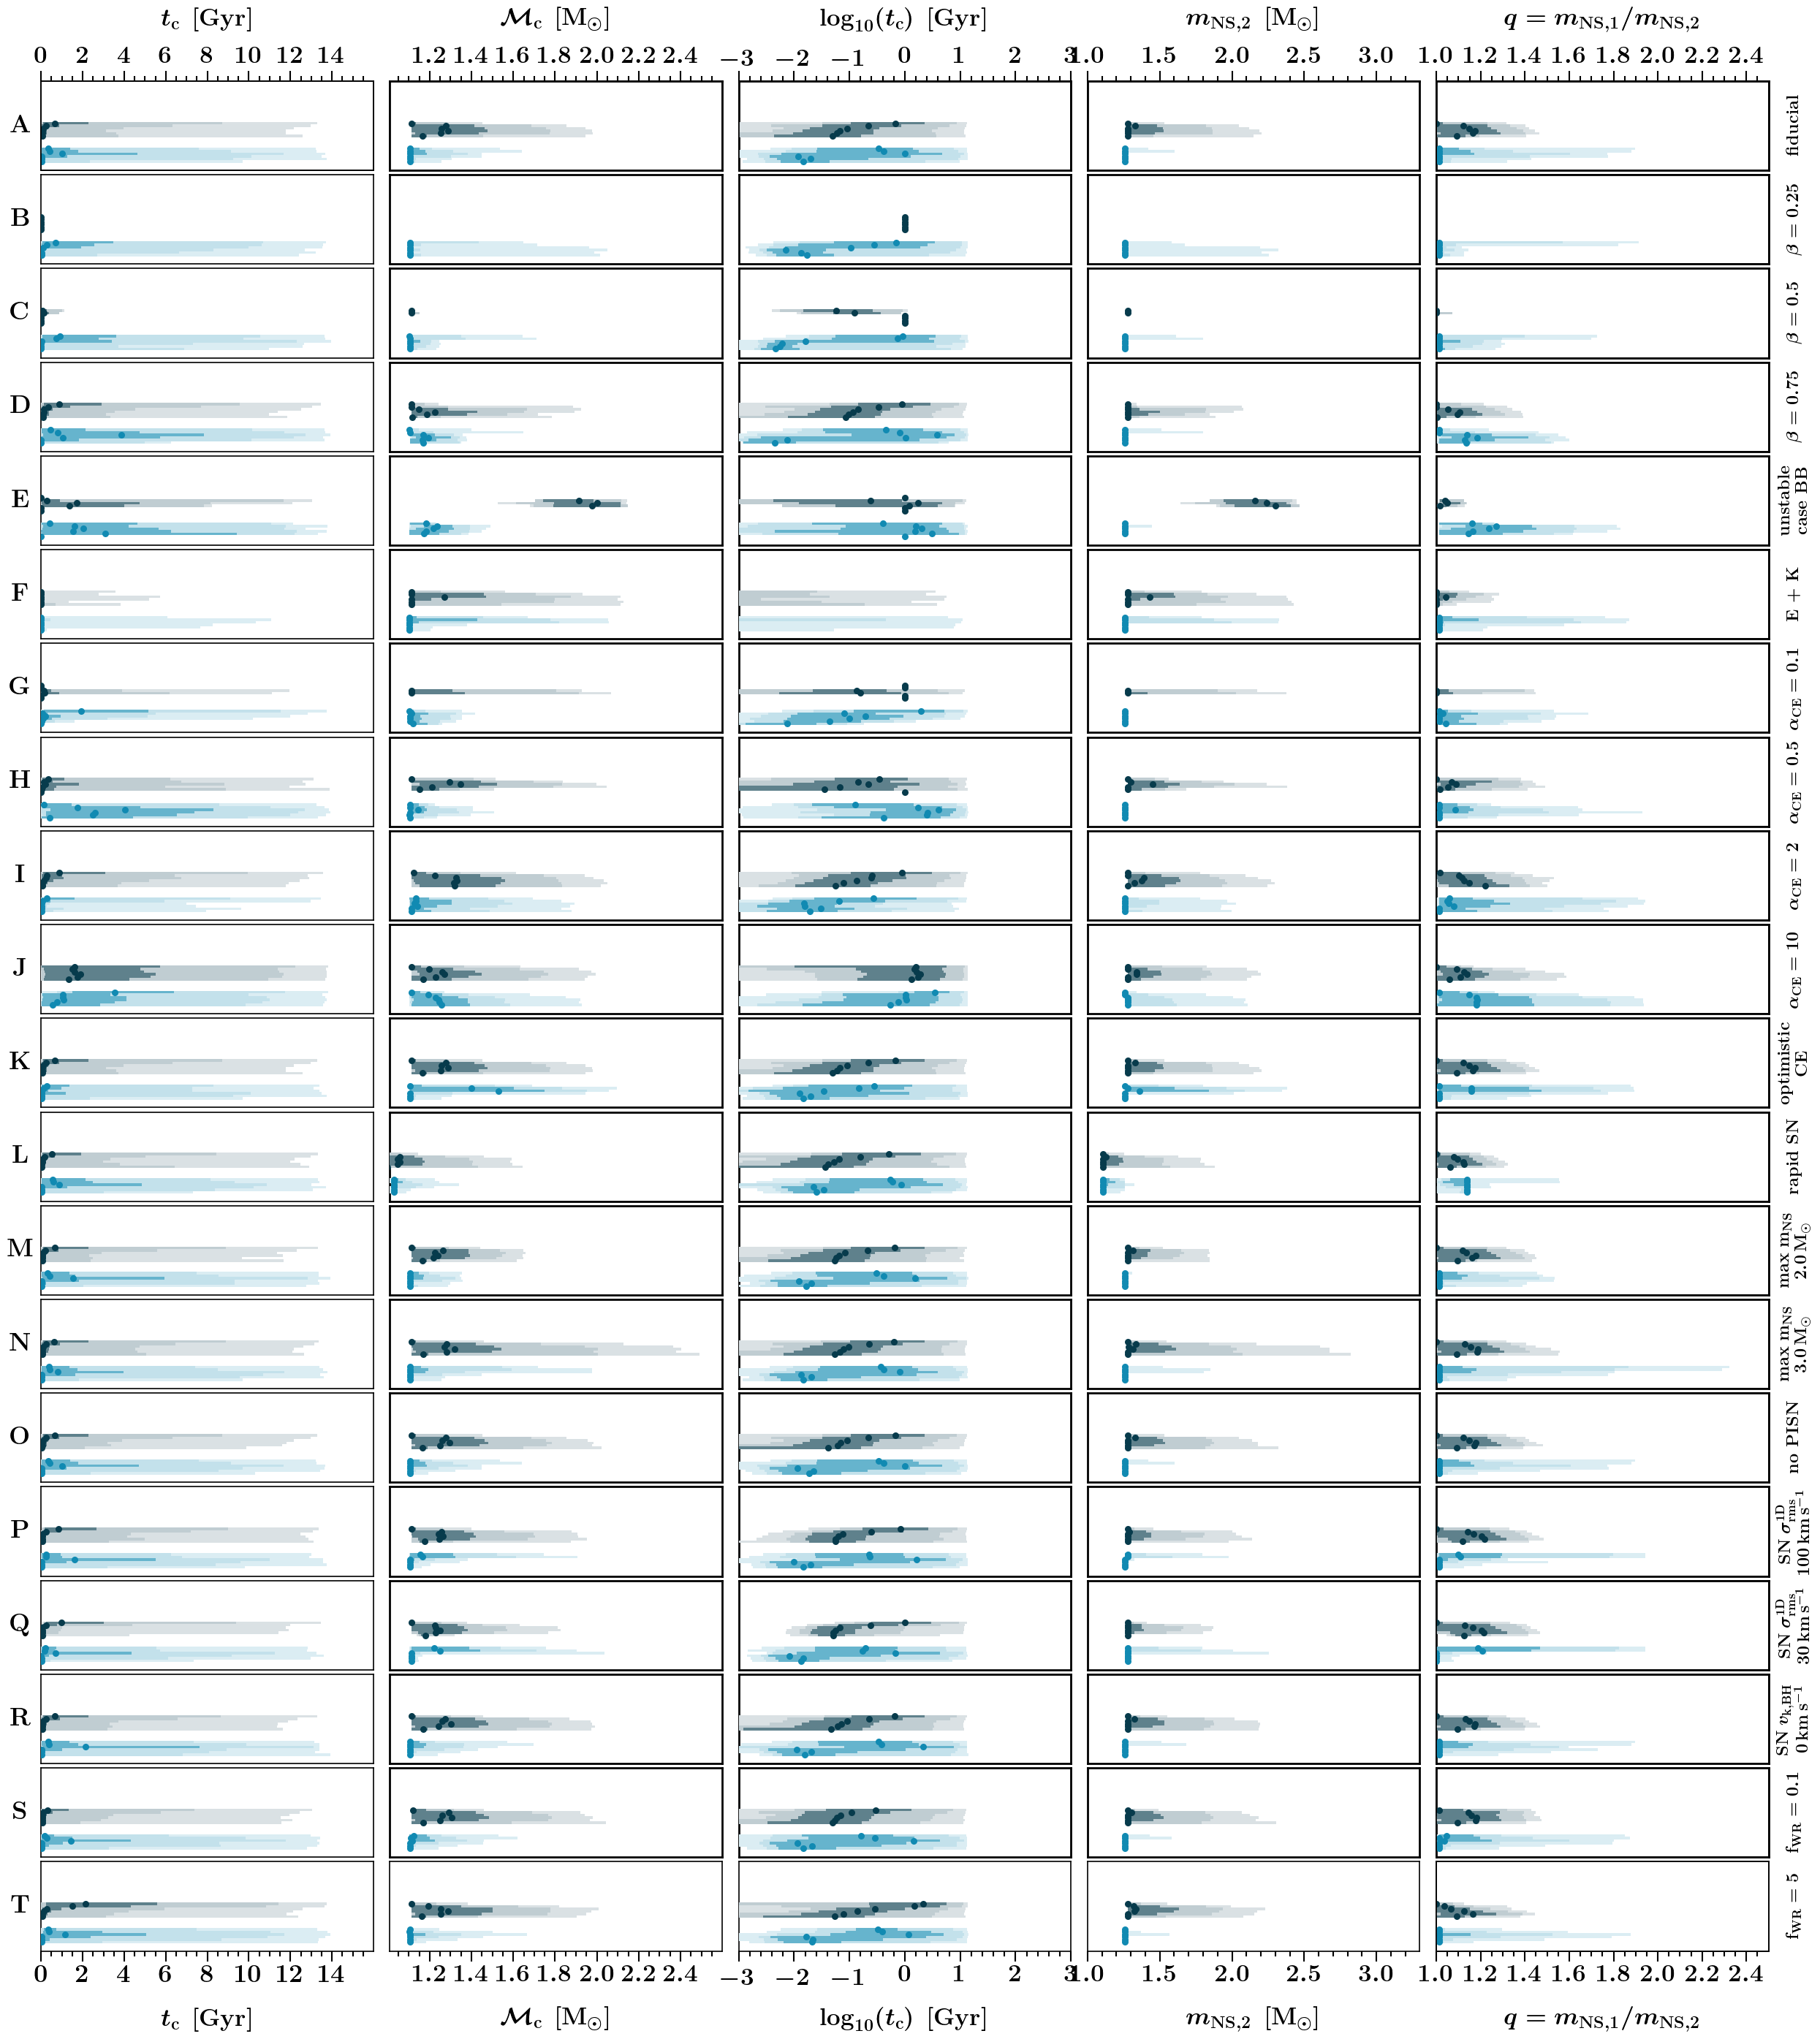

In [61]:
physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}', r'\textbf{E + K}',\
                           r'$\alpha_{\rm{CE}}=0.1$', r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'$\alpha_{\rm{CE}}=10$',  r'\textbf{optimistic}' +'\n' + r'\textbf{CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' , r'$\rm{f}_{\rm{WR}} = 0.1$', r'$\rm{f}_{\rm{WR}} = 5$']

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}






# # add location of the COMPAS hdf5 files:
# path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'
# 
ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})

whichWeight='stroopwafel'
TYPE = 'BNS'
DCOtype='BNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
# nModels=20  # number of BPS models we are comparing
# BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
# whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
# pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 24



# FIRST COLUMN WITH CHIRP MASS ###
# xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# # plot percentiles:
# # plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 3], \
# #                               whichWeight=whichWeight, path_dir=path_dir)
# xlim=[1.01,2.599]
# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# # top label
# ylim=None
# ax2x = ax[0,axe_ind].twiny()
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)


## FIRST  COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tc', 0,  r' $t_{\rm{c}}$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[0,15.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 







# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.01,2.599], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
# ## THIRD COLUMN WITH MASS 1 ###
# xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{NS,1}}$ $ \,  [\rm{M}_{\odot}]$'
# xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
# plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# ax2x = ax[0,axe_ind].twiny()  # top label 
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 




####### COLUMN WITH log10 tdelay ########
xparam, axe_ind, xlabelname ='log10(tc)', 2,  r' $\log_{10}(t_{\rm{c}})$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[-3,3], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 






##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{NS,1}} / {m}_{\rm{NS,2}}$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.0,2.5], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05) 
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + DCOtype+ 'channels.png', transparent=False)
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + DCOtype+ 'channels.pdf', transparent=False)
plt.show()
plt.close()






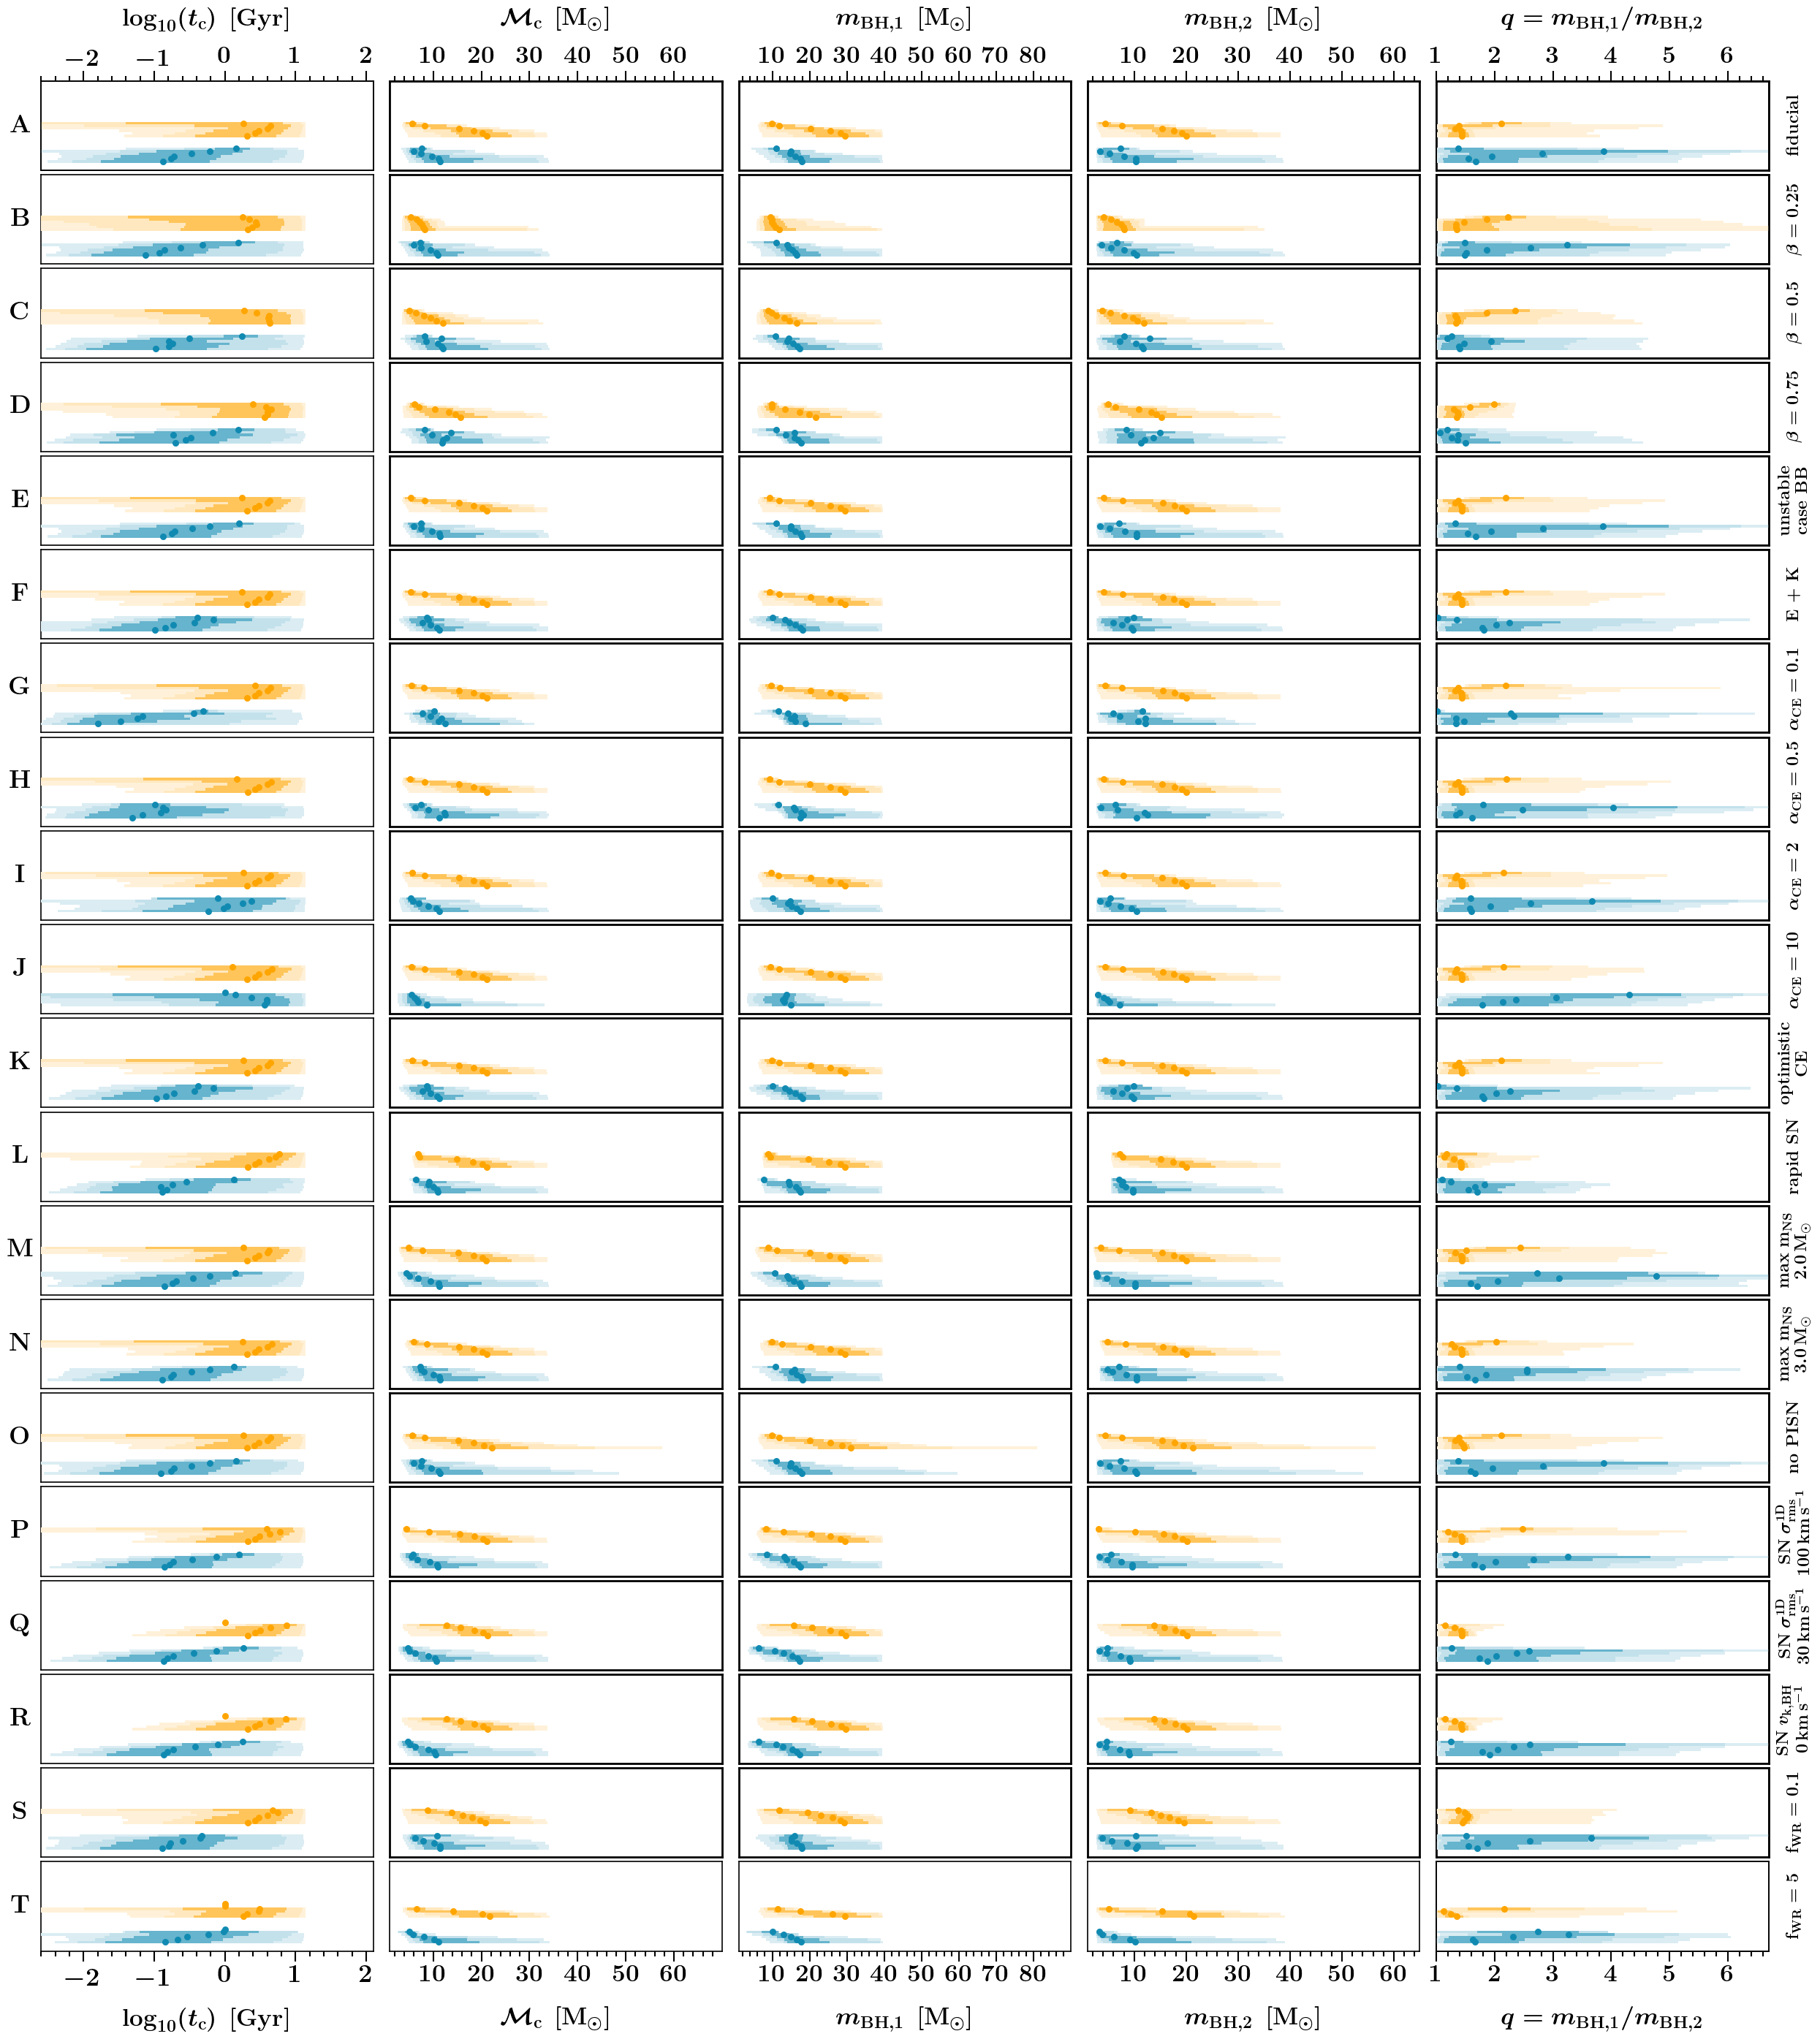

In [62]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda2/DATA/AllDCO_bugfix/'

ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BBH'
DCOtype='BBH'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
# nModels=17  # number of BPS models we are comparing
# BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
# whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
# pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 24



# FIRST COLUMN WITH CHIRP MASS ###
# xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# # plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 95], \
#                               whichWeight=whichWeight, path_dir=path_dir)
# xlim=[1.01,69.99]
# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# # top label
# ylim=None
# ax2x = ax[0,axe_ind].twiny()
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)


## FIRST  COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='log10(tc)', 0,  r' $\log_{10}(t_{\rm{c}})$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[-2.6,2.1], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 








# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.01,69.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{BH,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,89.99], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,64.99], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{BH,1}} / {m}_{\rm{BH,2}}$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.0,6.7], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)  
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + DCOtype+ 'channels.png', transparent=False)
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + DCOtype+ 'channels.pdf', transparent=False)
plt.show()
plt.close()




